In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Q1: Install and load the latest versions of TensorFlow and Keras. Print their versions.
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.12.0
Keras version: 2.12.0


In [4]:
# Q2: Load the Wine Quality dataset and explore its dimensions.
wine_data = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
print("Wine Quality dataset dimensions:", wine_data.shape)

Wine Quality dataset dimensions: (1143, 13)


In [5]:
# Q3: Check for null values, identify categorical variables, and encode them.
# Check for null values
print("Null values in the dataset:\n", wine_data.isnull().sum())

Null values in the dataset:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [7]:
# Q4: Separate the features and target variables from the dataset.
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

In [8]:
# Q5: Perform a train-test split, dividing the data into training, validation, and test datasets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [9]:
# Q6: Scale the dataset using an appropriate scaling technique.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [12]:
# Determine the number of features (columns) in the dataset
input_dim = wine_data.shape[1] - 1  # Subtract 1 for the target column (assuming the target is the last column)

# Q7: Design and implement at least two hidden layers and an output layer for the binary categorical variables.
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [13]:
# Q8: Print the summary of the model architecture.
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,985
Trainable params: 9,985
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Q9: Set the loss function ('binary_crossentropy'), optimizer, and include the accuracy metric in the model.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:
# Q10: Compile the model with the specified loss function, optimizer, and metrics.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [16]:
# Q11: Fit the model to the training data using an appropriate batch size and number of epochs.
history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=10, validation_data=(X_val_scaled, y_val))


Epoch 1/10
25/25 [==============================] - 1s 15ms/step - loss: -10.8939 - accuracy: 0.0000e+00 - val_loss: -25.1435 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: -41.9633 - accuracy: 0.0000e+00 - val_loss: -74.5478 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: -108.6263 - accuracy: 0.0000e+00 - val_loss: -177.1488 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: -237.3057 - accuracy: 0.0000e+00 - val_loss: -369.5407 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: -467.6548 - accuracy: 0.0000e+00 - val_loss: -690.9232 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: -837.0022 - accuracy: 0.0000e+00 - val_loss: -1194.6833 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: -1397.

In [17]:
# Q12: Obtain the model's parameters (weights and biases).
model_params = model.get_weights()

In [18]:
# Q13: Store the model's training history as a Pandas DataFrame.
history_df = pd.DataFrame(history.history)


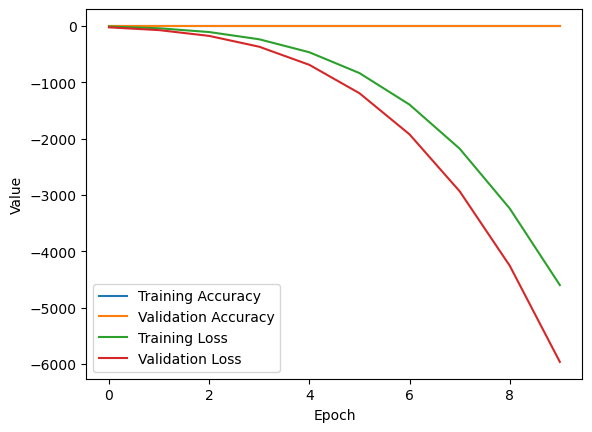

In [19]:
# Q14: Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.
import matplotlib.pyplot as plt

plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()


In [20]:
# Q15: Evaluate the model's performance using the test dataset and report relevant metrics.
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

6/6 [==============================] - 0s 2ms/step - loss: -5700.4775 - accuracy: 0.0000e+00
Test Loss: -5700.4775390625
Test Accuracy: 0.0
